In [1]:
import pandas as pd
import numpy as np
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt
import json

**Link to GitHib repository: https://github.com/MSikos**

In [2]:
# Set system path

path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialization Course\envs\Citi-Bike'
#path = r'C:\Users\Stony\Videos\CareerFoundry\Citi-Bike'

In [3]:
# Import dataset from prior exercise

df_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'), index_col = 0)

C:\Users\Stony\AppData\Local\Temp\ipykernel_3280\1699888674.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.csv'), index_col = 0)


In [4]:
df_final.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
started                object
ride_date              object
dtype: object

In [4]:
# Create a value column and group by start and end station 

df_final['value'] = 1
df_group = df_final.groupby(['end_station_name', 'start_station_name', ]).agg({'value':'count', 'end_lat':'mean', 'end_lng':'mean', 'start_lat':'mean', 'start_lng':'mean'}).reset_index()

In [6]:
df_group

,end_station_name,start_station_name,value,end_lat,end_lng,start_lat,start_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792335,-73.938280
1,1 Ave & E 110 St,1 Ave & E 16 St,5,40.792327,-73.938300,40.732295,-73.981624
2,1 Ave & E 110 St,1 Ave & E 18 St,6,40.792327,-73.938300,40.733910,-73.980488
3,1 Ave & E 110 St,1 Ave & E 30 St,25,40.792327,-73.938300,40.741497,-73.976623
4,1 Ave & E 110 St,1 Ave & E 39 St,78,40.792327,-73.938300,40.747149,-73.971126
...,...,...,...,...,...,...,...
1013392,Yankee Ferry Terminal,West St & Liberty St,3,40.687066,-74.016756,40.711444,-74.014847
1013393,Yankee Ferry Terminal,Whitehall St & Bridge St,1,40.687066,-74.016756,40.703662,-74.013181
1013394,Yankee Ferry Terminal,William St & Pine St,2,40.687066,-74.016756,40.707179,-74.008873
1013395,Yankee Ferry Terminal,Yankee Ferry Terminal,5759,40.687066,-74.016756,40.687067,-74.016754


In [5]:
# Get the top 100 routes from the top starting stations

top500 = df_group.nlargest(500, 'value')

In [6]:
print(top500['value'].sum())
print(top500.shape)

1151069
(500, 7)


In [9]:
top500['value'].describe()

count      500.000000
mean      2302.138000
std       1057.697863
min       1518.000000
25%       1670.000000
50%       1931.500000
75%       2517.250000
max      12041.000000
Name: value, dtype: float64

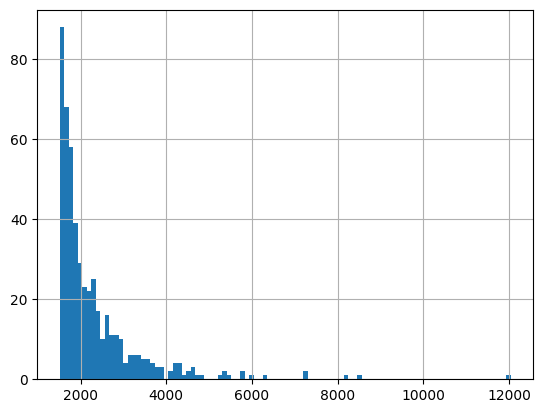

In [10]:
top500['value'].hist(bins = 100)
plt.show()

[]

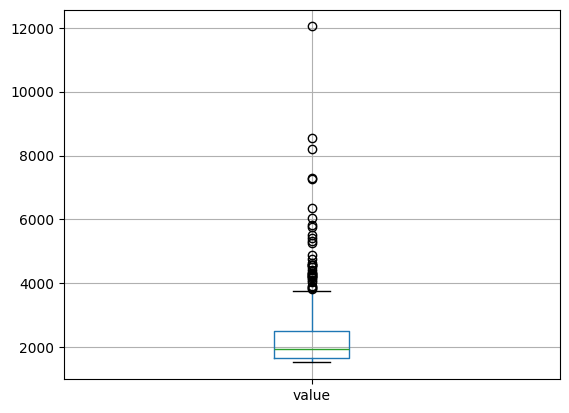

In [11]:
b_plot = top500.boxplot(column = 'value') 
b_plot.plot()

In [7]:
top500['value'].sort_index().value_counts()

value
1655    5
1782    3
1864    3
1573    3
1616    3
       ..
2208    1
1950    1
2588    1
1561    1
1547    1
Name: count, Length: 421, dtype: int64

In [13]:
top500.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_top_500_routes.csv'))

In [14]:
top500.head()

,end_station_name,start_station_name,value,end_lat,end_lng,start_lat,start_lng
295963,Central Park S & 6 Ave,Central Park S & 6 Ave,12041,40.765909,-73.976342,40.765913,-73.976346
148889,7 Ave & Central Park South,7 Ave & Central Park South,8541,40.766741,-73.979069,40.766733,-73.979084
783607,Roosevelt Island Tramway,Roosevelt Island Tramway,8213,40.757284,-73.953600,40.757282,-73.953597
546962,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,7287,40.764397,-73.973715,40.764393,-73.973730
801965,Soissons Landing,Soissons Landing,7275,40.692317,-74.014866,40.692320,-74.014865


In [8]:
# Create KeplerGl instance

m = KeplerGl(height = 900, data={"data_1": top500})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                          end_station_name                 start_station_name  \
29596…

I changed the colors of the starting stations to be a gradient from white to blue and the arc color was changed to a red color. I made these changes for two reasons: the first to make the data points and elements easier to see, and the second reason is to make the visualization easier to use for color-blind people.

Some areas of note are the stations around Central Park are busier stations, as are the stations around the Flatiron district, and the Theater district. There seems to be common factors with nearby parks, the proximity to the rivers that surround Manhatten, or sites that are popular wit tourists.

In [9]:
# Save a configuration file

config = m.config
with open('keplergl_config.json', 'w') as f:
    json.dump(config, f) # Save the configuration as JSON

In [10]:
# Save the KeplerGl map to a HTML file

m.save_to_html(file_name='NYC Bike Trips Top 500 Routes1.html', read_only = False, config = config)

Map saved to NYC Bike Trips Top 500 Routes1.html!
